### Demand forecasting - What is the cadence of reorder for STD & HYB dealers? (created by date)
### Is there a pattern that can identify different groups (i.e. YR, QTR, MNTH, WK)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import copy
import sys
import time
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# read local csv
df = pd.read_csv('df.csv',index_col=0,low_memory=False)
df.shape

(621303, 27)

In [4]:
df.tail(2)

,Sales_document,Sold_to_Party,SD_Item,SalesOffice,Order_Type,Product_Hierarchy,Material_Description,Unit_Price,Document_Date,Goods_Issue_Date,...,SL_Concat,Line_Req_Deliv_Date,ConfirmationStatus,Confirmed_Line_Quantity,Confirmed_Line_Value,Net_Value,Overall_Credit_Status_Desc,Net_Value_Actual,days_stale,waiting_days
621301,11242599,103648,10,HYB,OR,1.010101e+15,Roadie 20 Charcoal,129.99,2018-06-07,2018-06-11,...,0011242599_000010_0001,2018-06-06,Unconfirmed,0.0,0.0,7799.40,No Credit Issue,7799.40,True,-1
621302,11242596,103648,10,HYB,OR,1.010101e+15,Tundra 35 Charcoal,162.49,2018-06-07,2018-06-11,...,0011242596_000010_0001,2018-06-06,Unconfirmed,0.0,0.0,4387.23,No Credit Issue,4387.23,True,-1


In [5]:
df.columns

Index(['Sales_document', 'Sold_to_Party', 'SD_Item', 'SalesOffice',
       'Order_Type', 'Product_Hierarchy', 'Material_Description', 'Unit_Price',
       'Document_Date', 'Goods_Issue_Date', 'Overall_Credit_Status',
       'Delivery_Block', 'Billing_Block', 'Overall_Delivery_status_Item',
       'Overall_Order_Status_Header', 'Overall_Order_Status_Item',
       'Block_flag', 'SL_Concat', 'Line_Req_Deliv_Date', 'ConfirmationStatus',
       'Confirmed_Line_Quantity', 'Confirmed_Line_Value', 'Net_Value',
       'Overall_Credit_Status_Desc', 'Net_Value_Actual', 'days_stale',
       'waiting_days'],
      dtype='object')

In [10]:
wait_period_df

,Sales_document,Sold_to_Party,SD_Item,SalesOffice,Order_Type,Product_Hierarchy,Material_Description,Unit_Price,Document_Date,Goods_Issue_Date,...,Line_Req_Deliv_Date,ConfirmationStatus,Confirmed_Line_Quantity,Confirmed_Line_Value,Net_Value,Overall_Credit_Status_Desc,Net_Value_Actual,days_stale,waiting_days,wait
0,0010000001,0000107000,000010,STD,OR,1011122022162000,Hopper Flip 12 Field Tan,181.99,2017-02-04,2017-03-28,...,2017-03-01,Confirmed,6.0,1091.94,1091.94,No Credit Issue,1091.94,FALSE,25,1
1,0010000000,0000101539,000010,STD,OR,1011122022162000,Hopper Flip 12 Field Tan,189.72,2017-02-04,2017-03-28,...,2017-03-01,Confirmed,1.0,189.72,189.72,No Credit Issue,189.72,FALSE,25,1
2,0010000011,0000101539,000010,STD,OR,1011122022162000,Hopper Flip 12 Field Tan,189.72,2017-02-04,2017-03-28,...,2017-03-01,Confirmed,3.0,569.17,569.17,No Credit Issue,569.17,FALSE,25,1
3,0010000009,0000101539,000010,STD,OR,1011122022162000,Hopper Flip 12 Field Tan,189.72,2017-02-04,2017-03-28,...,2017-03-01,Confirmed,3.0,569.17,569.17,No Credit Issue,569.17,FALSE,25,1
4,0010000012,0000101539,000010,STD,OR,1011122022162000,Hopper Flip 12 Field Tan,189.72,2017-02-04,2017-03-28,...,2017-03-01,Confirmed,3.0,569.17,569.17,No Credit Issue,569.17,FALSE,25,1
5,0010000010,0000101539,000010,STD,OR,1011122022162000,Hopper Flip 12 Field Tan,189.72,2017-02-04,2017-03-28,...,2017-03-01,Confirmed,3.0,569.17,569.17,No Credit Issue,569.17,FALSE,25,1
6,0010000013,0000101539,000010,STD,OR,1011122022162000,Hopper Flip 12 Field Tan,189.72,2017-02-04,2017-03-28,...,2017-03-01,Confirmed,3.0,569.17,569.17,No Credit Issue,569.17,FALSE,25,1
7,0010000007,0000101348,000010,STD,OR,1010101021191000,Tundra 125 White,357.49,2017-02-04,2017-03-30,...,2017-04-03,Confirmed,20.0,7149.80,7149.80,No Credit Issue,7149.80,FALSE,58,1
8,0010000006,0000101348,000010,STD,OR,1010101021191000,Tundra 125 White,357.49,2017-02-04,2017-04-27,...,2017-05-01,Confirmed,20.0,7149.80,7149.80,No Credit Issue,7149.80,FALSE,86,1
9,0010000007,0000101348,000020,STD,OR,1010101021151500,Tundra 65 LE Seafoam,259.99,2017-02-04,2017-03-30,...,2017-04-03,Confirmed,1.0,259.99,259.99,No Credit Issue,259.99,FALSE,58,1


In [192]:
# correct data types
df['Sales_document'] = df['Sales_document'].astype('str')
df['Sold_to_Party'] = df['Sold_to_Party'].astype('str')
df['Product_Hierarchy'] = df['Product_Hierarchy'].astype('str')

df['Document_Date'] = pd.to_datetime(df['Document_Date'])

# restore paddings
for i, row in df.iterrows():
    df.loc[i,'Sales_document'] = df.loc[i,'Sales_document'].zfill(10)
    df.loc[i,'Sold_to_Party'] = df.loc[i,'Sold_to_Party'].zfill(10)
    if hit_limit(i):      # progress update
        break


99.790%

In [11]:
df.head(2)

,Sales_document,Sold_to_Party,SD_Item,SalesOffice,Order_Type,Product_Hierarchy,Material_Description,Unit_Price,Document_Date,Goods_Issue_Date,...,Overall_Order_Status_Item,Block_flag,Line_Req_Deliv_Date,ConfirmationStatus,Confirmed_Line_Quantity,Confirmed_Line_Value,Net_Value,Overall_Credit_Status_Desc,Net_Value_Actual,days_stale
0,0010000012,0000101539,000010,STD,OR,1011122022162000,Hopper Flip 12 Field Tan,189.72,2017-02-04,2017-03-28,...,C,None,2017-03-01,Confirmed,3.0,569.17,569.17,No Credit Issue,569.17,FALSE
1,0010000013,0000101539,000010,STD,OR,1011122022162000,Hopper Flip 12 Field Tan,189.72,2017-02-04,2017-03-28,...,C,None,2017-03-01,Confirmed,3.0,569.17,569.17,No Credit Issue,569.17,FALSE


In [12]:
df.shape

(630018, 25)

In [14]:
len(df[df['SalesOffice']=='HYB'])

48477

In [15]:
len(df[df['SalesOffice']=='STD'])

581541

In [16]:
print("# of unique STD customer ID in df:", len(df.loc[df['SalesOffice']=='STD']['Sold_to_Party'].unique()))
print('# of unique HYB customer ID in df:', len(df.loc[df['SalesOffice']=='HYB']['Sold_to_Party'].unique()))

# of unique STD customer ID in df: 5680
# of unique HYB customer ID in df: 26


In [17]:
STD_orders, HYB_orders = {}, {}   # STD_orders['customerID'] = {['orderID_1', 'orderID_2', ...]}

def record_customer_orders(sales_office):
    local_df = choose_local_df(sales_office)
    d = STD_orders if sales_office == 'STD' else HYB_orders
    for row_index, row in local_df.iterrows():
        customerID, orderID = row['Sold_to_Party'], row['Sales_document']
        if customerID not in d:
            d[customerID] = []
        if orderID not in d[customerID]:    # append unique orderID
            d[customerID].append(orderID)
        if hit_limit(row_index,len(local_df)):
            break
    print("\nComplete recording order ID per customer:", sales_office)

def choose_local_df(sales_office):
    local_df = df.loc[df['SalesOffice'] == sales_office].reset_index()
    return local_df

def hit_limit(i, upper_bound):
    upper_bound = int(upper_bound)
    if i == upper_bound:
        return True
    if i % 10000 == 0:
        sys.stdout.write('\r'+"{0:.3%}".format(i/upper_bound))
        sys.stdout.flush()

record_customer_orders('STD')
record_customer_orders('HYB')

99.735%
Complete recording order ID per customer: STD
82.513%
Complete recording order ID per customer: HYB


In [18]:
print("# of unique STD customer IDs in STD_orders:", len(STD_orders))
print("# of unique HYB customer IDs in HYB_orders:", len(HYB_orders))

# of unique STD customer IDs in STD_orders: 5680
# of unique HYB customer IDs in HYB_orders: 26


In [20]:
# customers with only 1 order (no reorder history) are excluded
HYB_customer_order_intervals, STD_customer_order_intervals = {}, {}

def calculate_order_freq(sales_office):
    
    local_df = choose_local_df(sales_office)
    d = STD_orders if sales_office == 'STD' else HYB_orders
    
    for i, row in local_df.iterrows():
        
        customerID = row['Sold_to_Party']
        order_hist = d[customerID]
        curr_order_date, curr_order_id = row['Document_Date'], row['Sales_document']
        
        if has_prev_order(order_hist,curr_order_id):
            prev_order_date = find_prev_order_date(local_df,customerID,i,order_hist,curr_order_id)
            order_interval = (curr_order_date - prev_order_date).days 
            append_interval(sales_office, customerID, order_interval)
            
        if hit_limit(i,len(local_df)):    # use small i for debugging
            break
            
    print("\nComplete calculating order intervals for",sales_office)

def has_prev_order(order_hist, curr_order_id):
    has_prev = True if order_hist.index(curr_order_id) > 0 else False
    return has_prev

def find_prev_order_date(local_df, customerID, row_index, order_hist, curr_order_id):
    prev_order_id = find_prev_order_id(customerID, order_hist, curr_order_id)
    for i in range(row_index,-1,-1):
        if customerID==local_df['Sold_to_Party'][i] and prev_order_id==local_df['Sales_document'][i]:
            return local_df['Document_Date'][i]

def find_prev_order_id(customerID, order_hist, curr_order_id):
    return order_hist[order_hist.index(curr_order_id) - 1]

def append_interval(sales_office, customerID, order_interval):
    d = STD_customer_order_intervals if sales_office == 'STD' else HYB_customer_order_intervals
    if customerID not in d:
        d[customerID] = []
    d[customerID].append(order_interval)  # include zero-day intervals

In [21]:
calculate_order_freq('HYB')

82.513%
Complete calculating order intervals for HYB


In [22]:
len(HYB_customer_order_intervals)

25

In [ ]:
# time consuming mod!!
calculate_order_freq("STD")
len(STD_customer_order_intervals)

In [403]:
len(STD_customer_order_intervals)

4952

In [ ]:
# entire dict of STD order intervals
STD_customer_order_intervals

In [829]:
# example of a STD customer's order history
std_df = choose_local_df('STD')
std_df.loc[std_df['Sold_to_Party']=='0000101348'][['Sold_to_Party','Sales_document','Material_Description','Unit_Price','Document_Date']]

,Sold_to_Party,Sales_document,Material_Description,Unit_Price,Document_Date
0,0000101348,0010000007,Tundra 65 LE Seafoam,259.99,2017-02-04
1,0000101348,0010000003,Tundra 125 White,357.49,2017-02-04
2,0000101348,0010000006,Tundra 125 White,357.49,2017-02-04
3,0000101348,0010000007,Tundra 125 White,357.49,2017-02-04
10293,0000101348,0010011932,Tundra 125 White,357.49,2017-02-05
48951,0000101348,0010044917,Hopper Two 40 Fog Gray,271.04,2017-03-01
78615,0000101348,0010093249,Hopper 30 Fog Gray,182.43,2017-04-05
291249,0000101348,0010421448,Tundra 125 White,357.49,2017-08-17
307431,0000101348,0010441567,Tundra 125 White,357.49,2017-08-31
345973,0000101348,0010524923,Tundra 75 White,304.92,2017-10-09


In [417]:
def calculate_reorder_rate():
    len(HYB_customer_order_intervals) / len(df.loc[df['SalesOffice']])

In [430]:
len(HYB_customer_order_intervals)

25

In [675]:
len(STD_customer_order_intervals)

4952

In [792]:
import numpy as np

def calculate_reorder_stats(sales_office, shape):
    
    d = HYB_customer_order_intervals if sales_office == 'HYB' else STD_customer_order_intervals
    order_hist = HYB_orders if sales_office == 'HYB' else STD_orders
    pre_df = []
    i, hi = 0, len(d)
    
    for key, val in d.items():
        
        intervals = np.asarray(val)
        num_of_zero = intervals.size - np.count_nonzero(intervals)
        m = np.ma.masked_values(intervals,0)
        max_, min_ = np.nanmax(intervals), np.nanmin(intervals)
        mean_, median_ = 0, 0
        
        if num_of_zero != intervals.size:
            mean_, median = np.ma.mean(m), np.ma.median(m)
        row = [key, len(d[key]), mean_, median_, max_, min_, num_of_zero]
        pre_df.extend(row)
        
        # progress update
        sys.stdout.write('\r'+"{0:.3%}".format(i/hi))
        sys.stdout.flush()
        i += 1
        
    mini_df = pd.DataFrame(np.asarray(pre_df).reshape(shape),
                           columns=['customer (id)','# of reorder intervals', 'mean (day)','median (day)',
                                    'max (day)','min (day)','num_of_zero (day)'])

    return mini_df

In [794]:
# prior to removing zeros
calculate_reorder_stats('HYB', (len(HYB_customer_order_intervals),7))

96.000%

,customer (id),# of reorder intervals,mean (day),median (day),max (day),min (day),num_of_zero (day)
0,0000101813,9042,5.9434832756632066,0,26,0,8175
1,0000102433,4346,10.98360655737705,0,58,0,3675
2,0000103430,1265,10.243037974683544,0,76,0,870
3,0000102173,8,8.857142857142858,0,48,0,1
4,0000100710,5255,1.7863117870722434,0,11,0,2625
5,0000100873,809,6.427609427609427,0,29,0,512
6,0000102853,1227,5.605590062111801,0,9,0,583
7,0000106889,1225,7.818181818181818,0,70,0,818
8,0000100395,2439,11.268802228412257,0,43,0,1721
9,0000107894,138,35.98571428571429,0,122,0,68


In [478]:
HYB_reorder_stats_0 = calculate_reorder_stats('HYB', (len(HYB_customer_order_intervals),7))
type(HYB_reorder_stats['mean'][2])

numpy.float64

In [813]:
STD_reorder_stats = calculate_reorder_stats('STD',(len(STD_customer_order_intervals),7))

99.980%

In [814]:
STD_reorder_stats.shape

(4952, 7)

In [815]:
STD_reorder_stats.head(10)

,customer (id),# of reorder intervals,mean (day),median (day),max (day),min (day),num_of_zero (day)
0,0000101348,22,24.842105263157894,0,134,0,3
1,0000101539,5059,5.163461538461538,0,20,0,4747
2,0000107000,362,16.881481481481483,0,52,0,92
3,0000105255,430,25.30421686746988,0,75,0,98
4,0000105208,64,23.454545454545453,0,138,0,20
5,0000104737,168,22.373015873015873,0,68,0,42
6,0000106996,455,10.819796954314722,0,53,0,61
7,0000104294,290,37.35087719298246,0,87,0,176
8,0000107142,119,23.466019417475728,0,61,0,16
9,0000104914,114,50.148148148148145,0,177,0,33


### plot distributions of re-order stats

In [808]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_reorder_stat(X,set_bins, kde_bool, x_label, y_label, title,sample_mean=None):
    plt.figure(figsize=(15,8))
    if sample_mean:
        plt.axvline(sample_mean,color='blue',alpha=0.8,linestyle='solid')
    plt.hist(X,bins=set_bins,density=kde_bool,color='brown',histtype='bar',edgecolor='k',alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()
    
def plot_reorder_kde(X,title):
    sns.set_style('whitegrid')
    sns.kdeplot(X,shade=True,bw=10)
    plt.title(title)

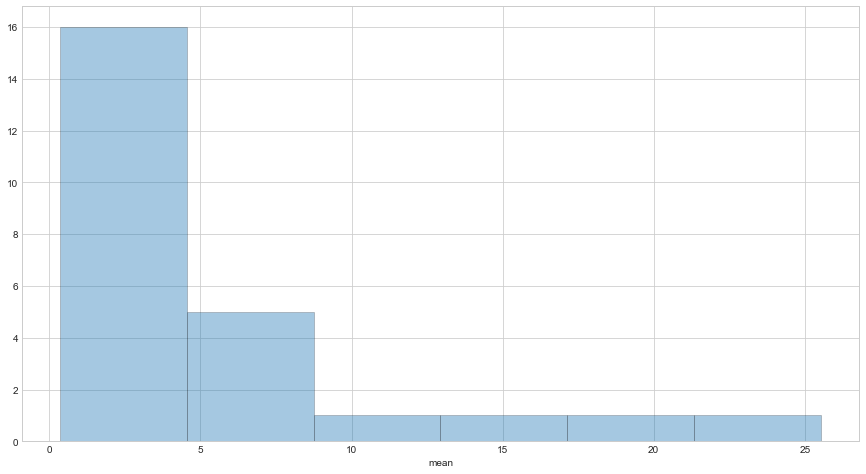

In [532]:
plot_reorder_stat(HYB_reorder_stats_0['mean'],False) # DON'T RUN
## too many same-day orders with different sales_document number (0 days between reorders)
## remove zeroes
## modify calculate_reorder_stats() to ignore zeroes

96.000%

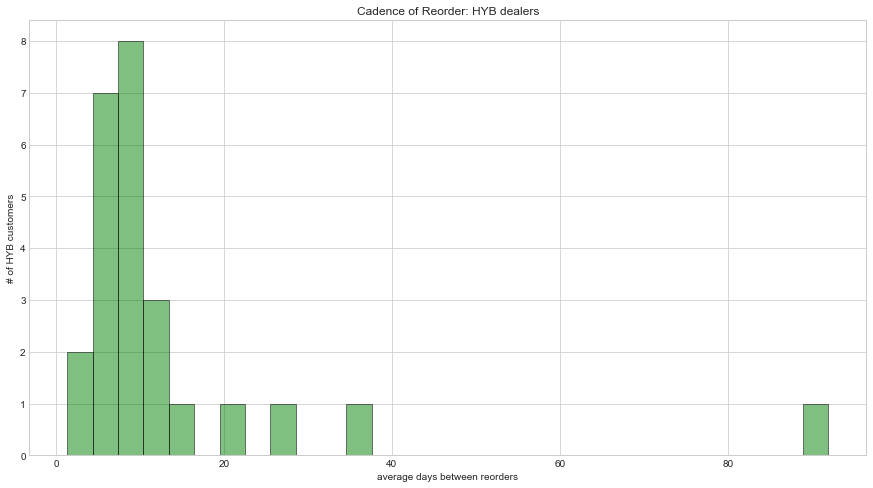

In [782]:
# after removing zeros
HYB_reorder_stats = calculate_reorder_stats('HYB', (len(HYB_customer_order_intervals),5))
plot_reorder_stat(HYB_reorder_stats['mean'], 30, False, 'average days between reorders', 
                  '# of HYB customers', 'Cadence of Reorder: HYB dealers')

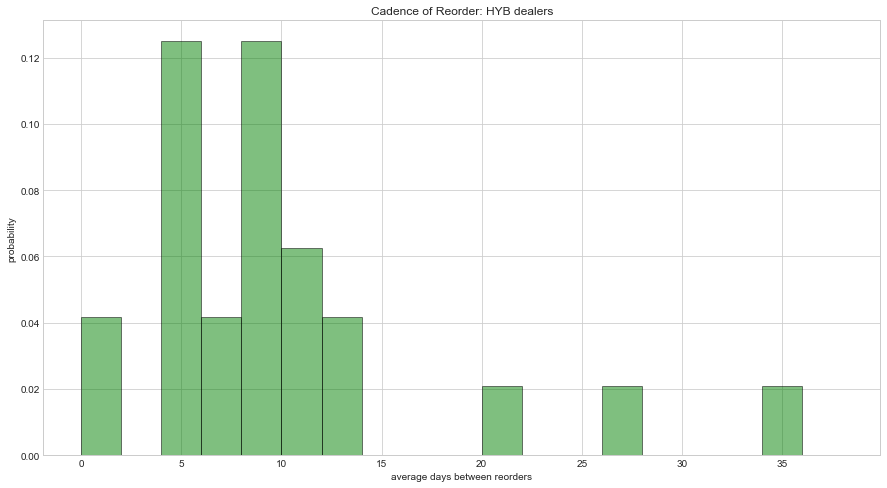

In [783]:
plot_reorder_stat(HYB_reorder_stats['mean'], [i*2 for i in range(20)],
                  True, 'average days between reorders',
                  'probability','Cadence of Reorder: HYB dealers')

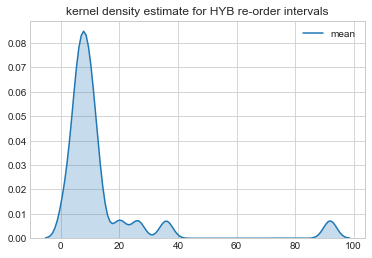

In [653]:
plot_reorder_kde(HYB_reorder_stats['mean'], 'kernel density estimate for HYB re-order intervals')

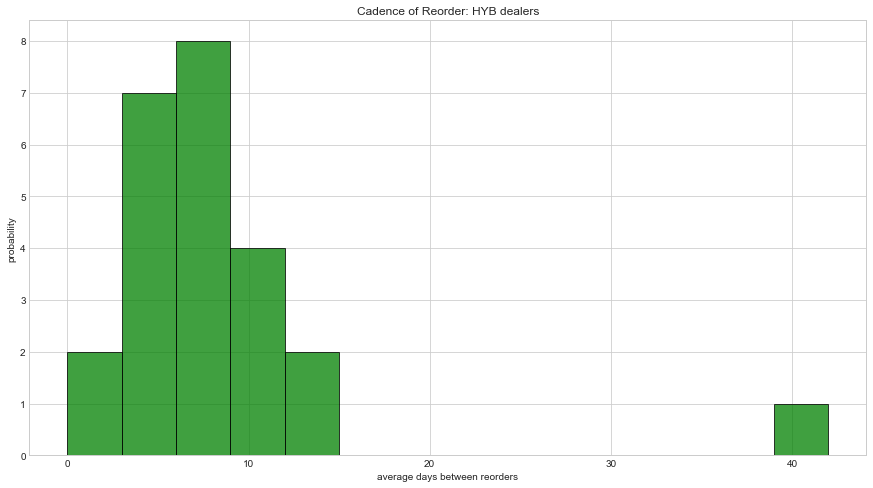

In [657]:
plot_reorder_stat(HYB_reorder_stats['median'], [i*3 for i in range(15)], False,
                  'average days between reorders', 
                  'probability','Cadence of Reorder: HYB dealers')

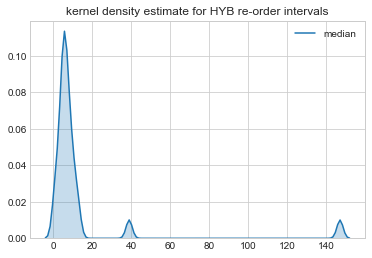

In [660]:
plot_reorder_kde(HYB_reorder_stats['median'], 'kernel density estimate for HYB re-order intervals')

In [734]:
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut

# CV to find optimal bandwidth for KDE
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(25))
grid.fit(np.asarray(STD_reorder_stats['mean']).reshape(-1,1))
grid.best_params_

{'bandwidth': 10.0}

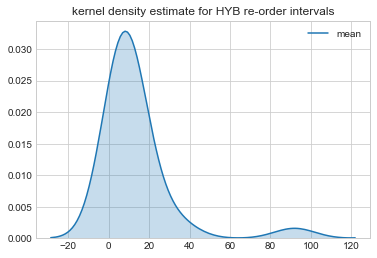

In [672]:
plot_reorder_kde(HYB_reorder_stats['mean'], 'kernel density estimate for HYB re-order intervals')

In [803]:
STD_reorder_stats.describe()

,mean,median,max,min,num_of_zero
count,4952.000000,4952.0,4952.000000,4952.000000,4952.000000
mean,58.048590,0.0,110.395396,12.752019,35.529887
std,54.552300,0.0,68.037569,41.994574,249.895523
min,0.000000,0.0,0.000000,0.000000,0.000000
25%,25.200000,0.0,64.000000,0.000000,0.000000
50%,41.255567,0.0,98.000000,0.000000,8.000000
75%,71.672203,0.0,145.000000,3.000000,28.000000
max,467.000000,0.0,467.000000,467.000000,14697.000000


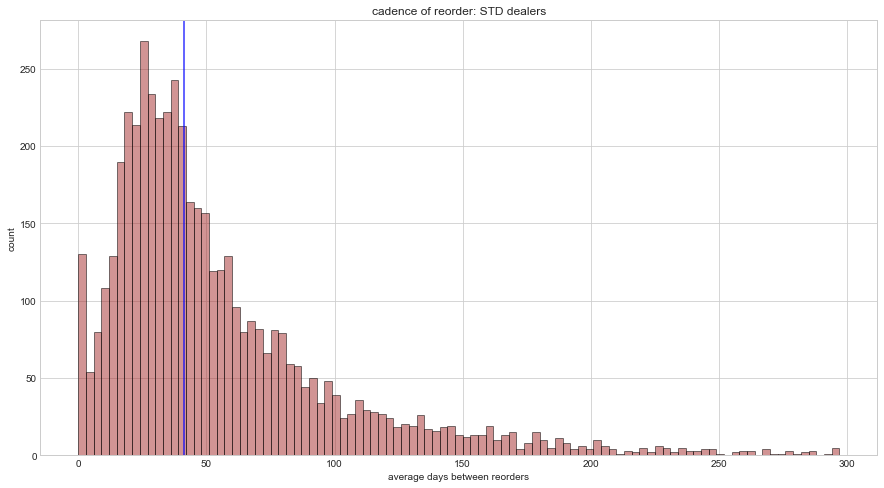

In [810]:
plot_reorder_stat(STD_reorder_stats['mean'],
                  [i*3 for i in range(100)],
                  False, 'average days between reorders',
                  'count','cadence of reorder: STD dealers',sample_mean=41.255567)

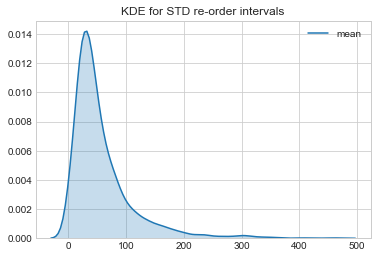

In [811]:
plot_reorder_kde(STD_reorder_stats['mean'],'KDE for STD re-order intervals')